# **NOTEBOOK 2: ANALYSIS AND PREPROCESSING**

In this notebook, data is going to be analyzed and prepared before modeling for forecasting.

---

To do so, we will visualize it, look for patterns, decompose the series, check its stability... everything that will allow us to draw the maximum of conclusions from the data.

# Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

First of all, we need to read the data we generated in the previous notebook.

In [16]:
# url initial data
url = '../files/data/daytype_parcels.csv'
# read the previous CSV file with the data (parcels and calendar data)
df_daytype_parcels = pd.read_csv(url, sep=",", index_col='date')
df_daytype_parcels.index = pd.to_datetime(df_daytype_parcels.index)
df_daytype_parcels.head()

,n_parcels,weekday,monthday,month,year,date_c,yearday,fest,eve,postFest,saturday,sunday,weekend,workable,blackFriday,blackFridayWeek,COVID,Christmas,typeDay
date,,,,,,,,,,,,,,,,,,,
2010-01-01,4.0,6,1,1,2010,2010-01-01,1,True,False,False,False,False,False,False,False,False,False,True,Christmas
2010-01-02,164.0,7,2,1,2010,2010-01-02,2,False,False,True,True,False,True,False,False,False,False,True,Christmas
2010-01-03,8.0,1,3,1,2010,2010-01-03,3,False,False,False,False,True,True,False,False,False,False,True,Christmas
2010-01-04,25345.0,2,4,1,2010,2010-01-04,4,False,False,False,False,False,False,True,False,False,False,True,Christmas
2010-01-05,20130.0,3,5,1,2010,2010-01-05,5,False,True,False,False,False,False,True,False,False,False,True,Christmas


# Analysis

**Time series plots**

First, we plot the graph of the historical orders per day of the week over the years. 

[Text(0.5, 1.0, 'n_parcels by weekday')]

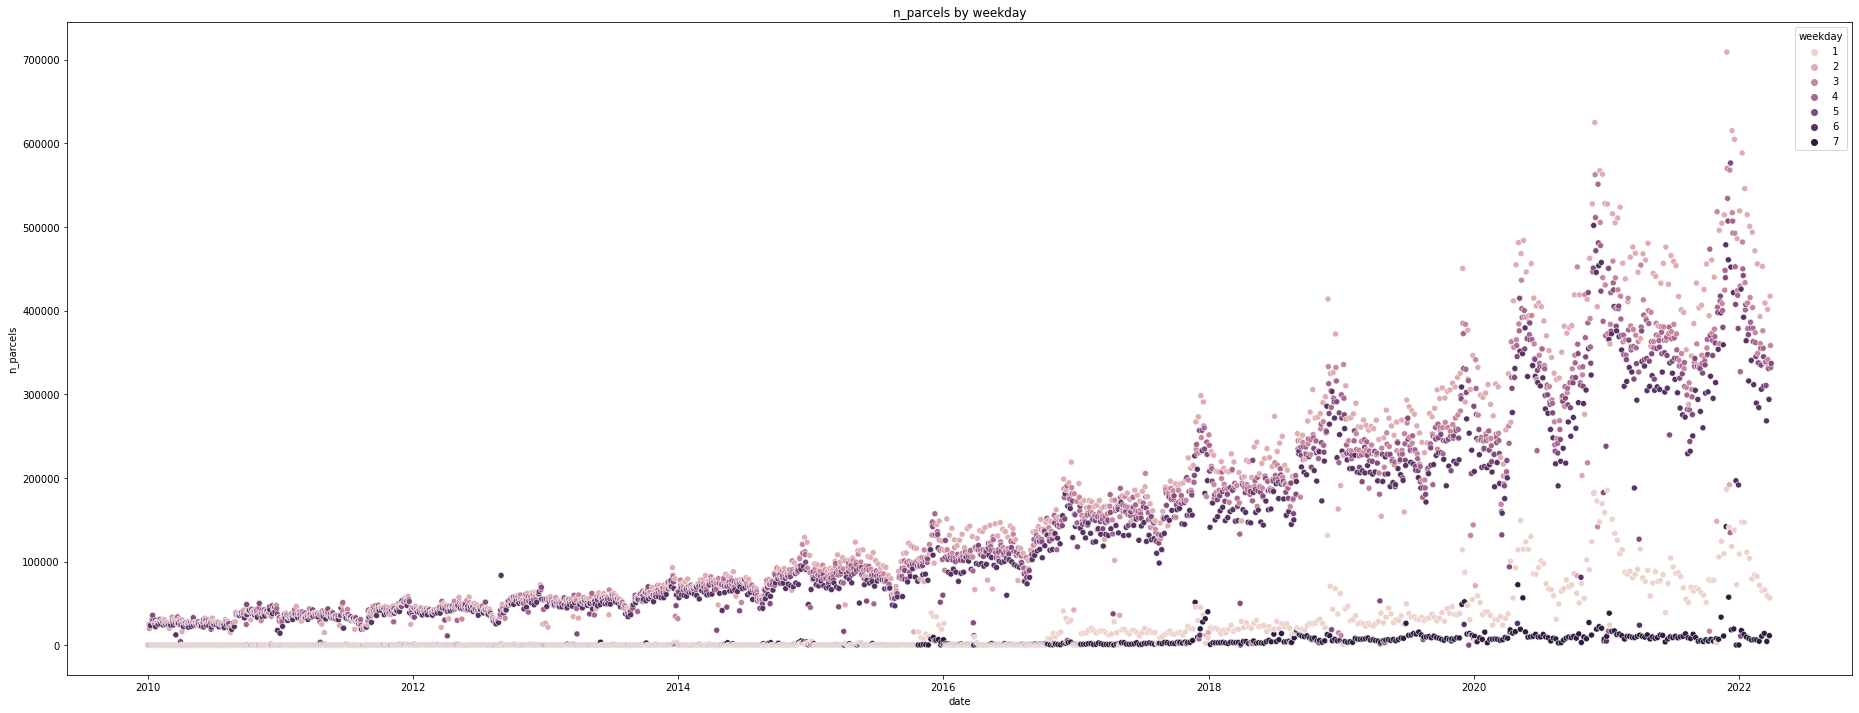

In [17]:
# plot per weekday
plt.figure(figsize=(32, 12))
sns.scatterplot(df_daytype_parcels.index, df_daytype_parcels['n_parcels'], hue=df_daytype_parcels['weekday']).set(title='n_parcels by weekday')

Here we can see that Saturdays (7) and Sundays (1) have a much lower number of orders. In addition, we can already see what shape the graph has, where we can see an upward trend and some seasonalities.

Now we plot the graph with the type of day we built earlier.

[Text(0.5, 1.0, 'n_parcels with main calendar')]

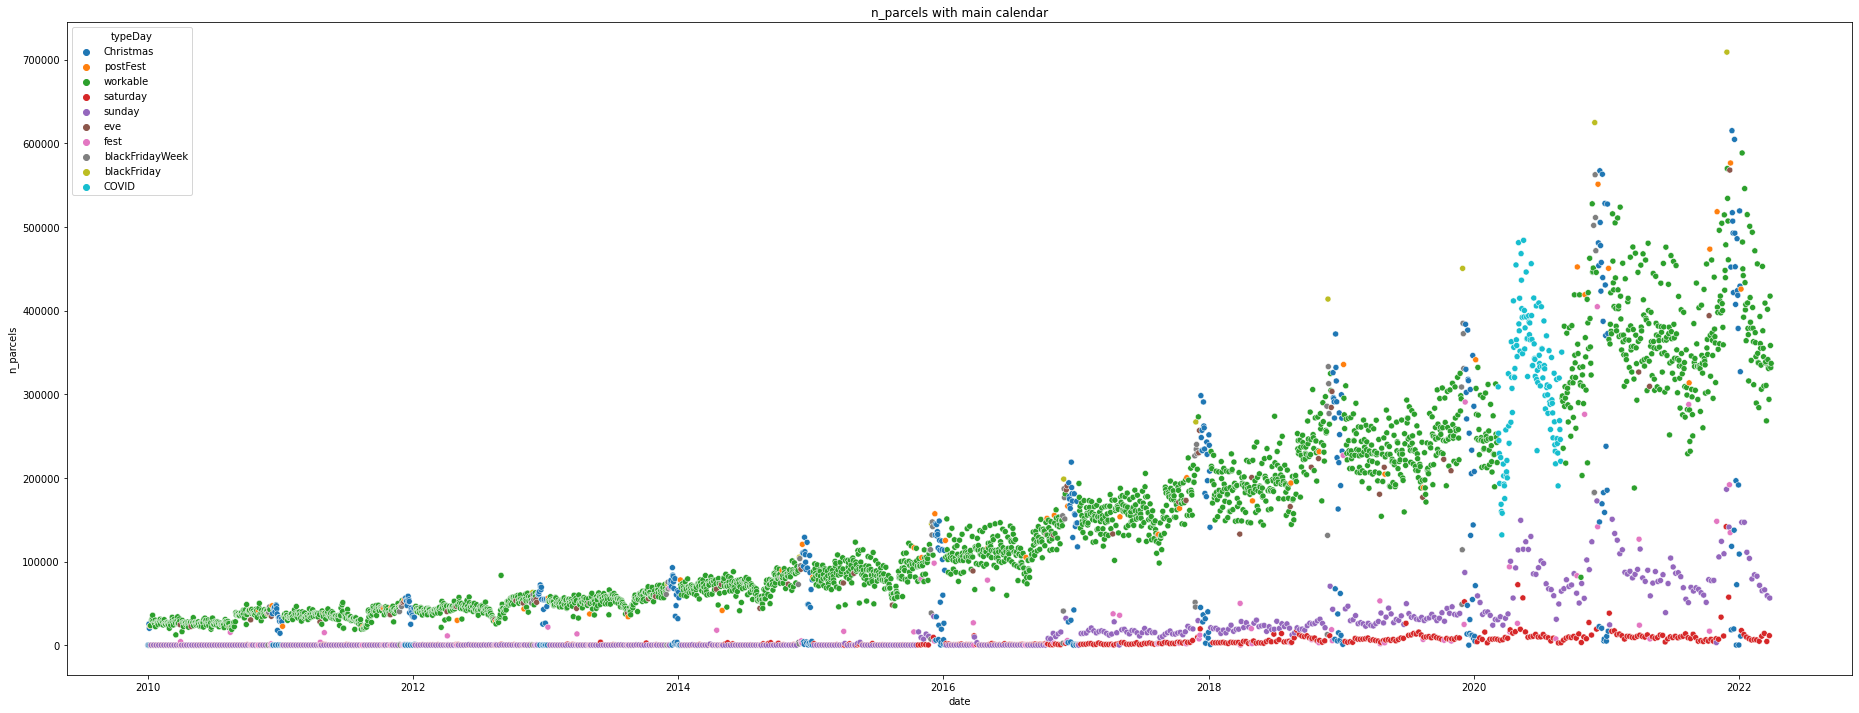

In [18]:
# plot with calendar
df_daytype_parcels_2010 = df_daytype_parcels[(df_daytype_parcels.index>='2010-01-01')&(df_daytype_parcels.index<'2023-01-01')]

plt.figure(figsize=(32, 12))
sns.scatterplot(df_daytype_parcels_2010.index, df_daytype_parcels_2010['n_parcels'], hue=df_daytype_parcels_2010['typeDay']).set(title='n_parcels with main calendar')

This graph is very interesting because we can see many things:

* There is a geometric trend in that the total number of parcels recorded does not remain in a parallel band throughout the days of the different years.
* There is an annual seasonality marked by a drop in the month of August (valley) and a generalized instability with higher peaks at the end of November and December due to Black Friday and Christmas.
* There is an unusual behaviour in the period marked as COVID in the form of an unusual peak after lockdown.
* Saturdays maintain almost zero activity throughout the period while Sundays are increasing in activity as time progresses.
* It is observed that it is not until 2016-2017 when weekends (with greater strength on Sundays) begin to have packet records and the instability at the end of the year is more evident.

Due to the behavior of the weekends and the slope of the trend, from now on we will be working with the dataset from 2017.

[Text(0.5, 1.0, 'n_parcels with main calendar since 2017')]

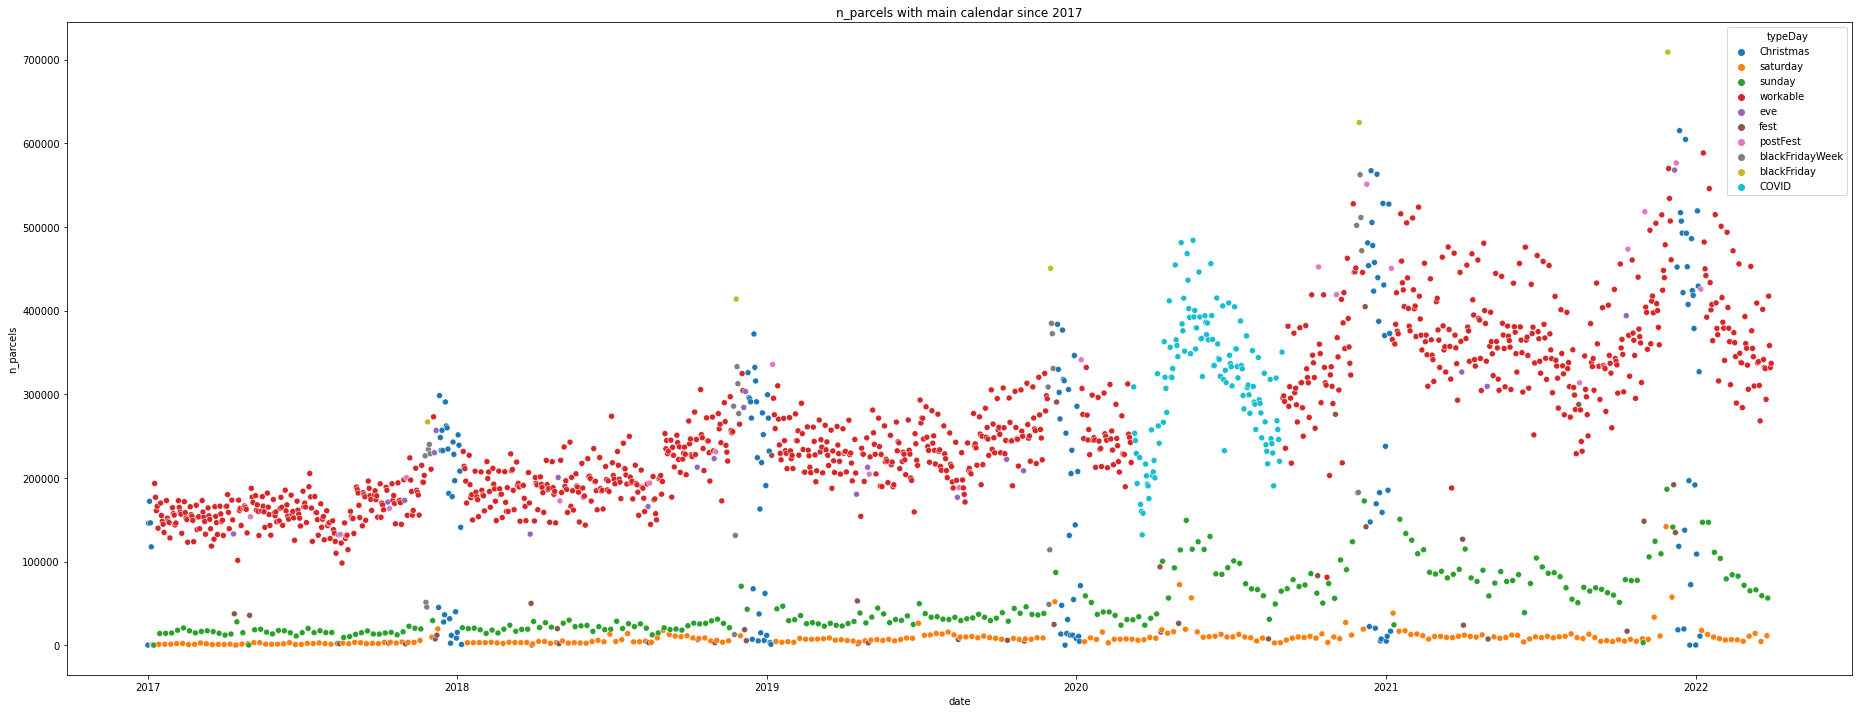

In [19]:
# plot with calendar since 2017

df_daytype_parcels_2016 = df_daytype_parcels[(df_daytype_parcels.index>='2016-01-03')&(df_daytype_parcels.index<'2023-01-01')]
df_daytype_parcels_2017 = df_daytype_parcels[(df_daytype_parcels.index>='2017-01-01')&(df_daytype_parcels.index<'2023-01-01')]

plt.figure(figsize=(32, 12))
sns.scatterplot(df_daytype_parcels_2017.index, df_daytype_parcels_2017['n_parcels'], hue=df_daytype_parcels_2017['typeDay']).set(title='n_parcels with main calendar since 2017')

In addition to the annual seasonality already mentioned, it seems interesting to analyze a possible weekly seasonality where there is a common pattern throughout the days of each week.

So, let's take a look at the shape of the days of the week. 

[Text(0.5, 1.0, 'n_parcels by day')]

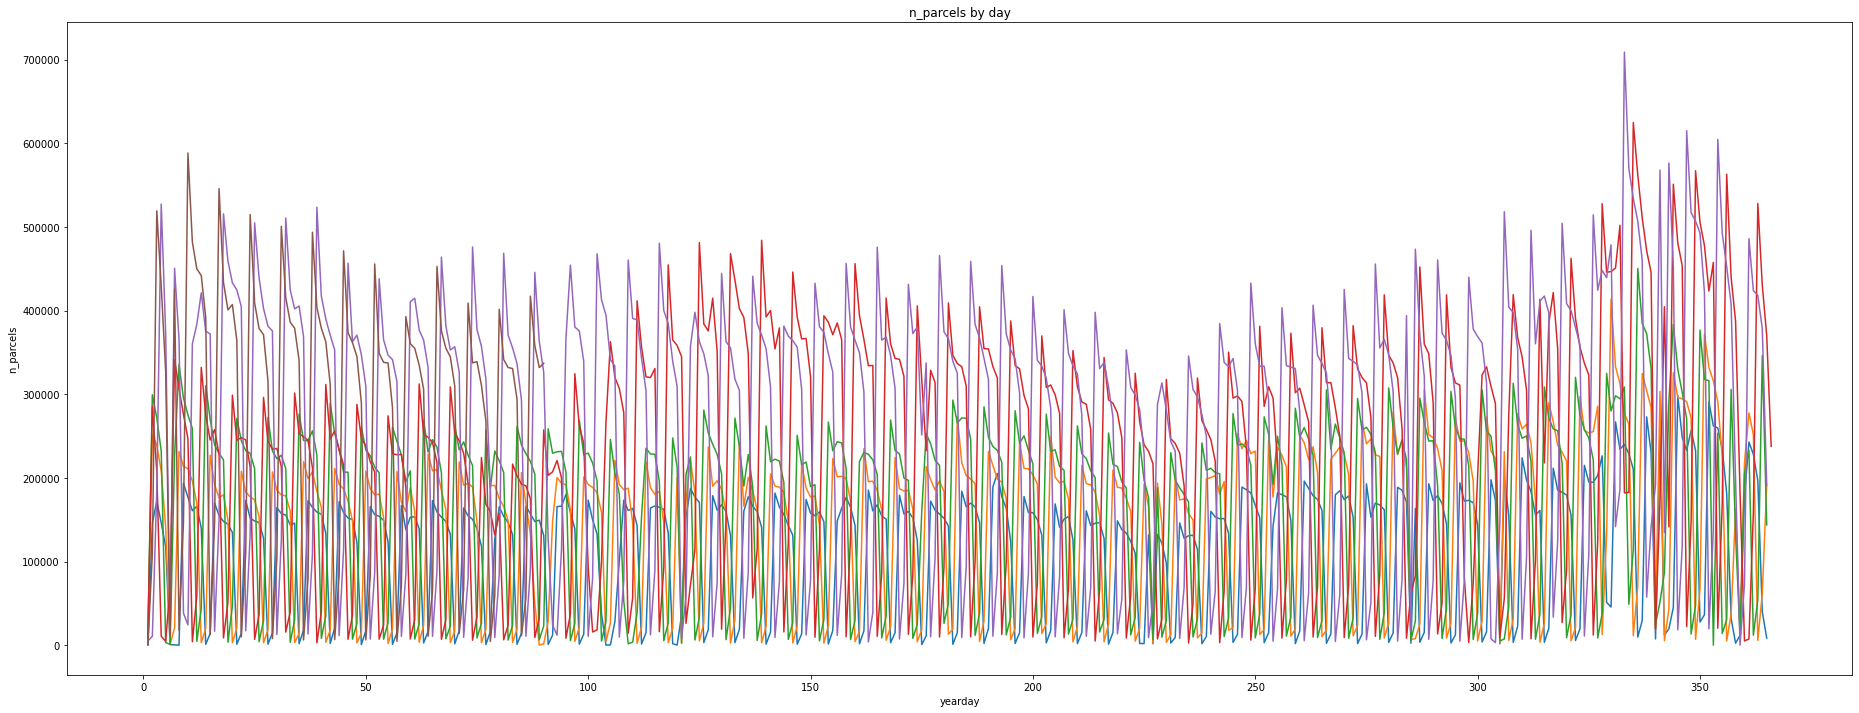

In [20]:
# plot weekly
plt.figure(figsize=(32, 12))
sns.lineplot(df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2017)]['yearday'], df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2017)]['n_parcels'])
sns.lineplot(df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2018)]['yearday'], df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2018)]['n_parcels'])
sns.lineplot(df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2019)]['yearday'], df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2019)]['n_parcels'])
sns.lineplot(df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2020)]['yearday'], df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2020)]['n_parcels'])
sns.lineplot(df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2021)]['yearday'], df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2021)]['n_parcels'])
sns.lineplot(df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2022)]['yearday'], df_daytype_parcels_2017[(df_daytype_parcels_2010['year']==2022)]['n_parcels']).set(title='n_parcels by day')

Looking at the graph for each of the years by day of the year, we observe that there is a pattern that is repeated for each of the weeks during all the years. We can also find it by visualizing the sum for each day of the week globally.

[Text(0.5, 1.0, 'sum n_parcels per day of the week')]

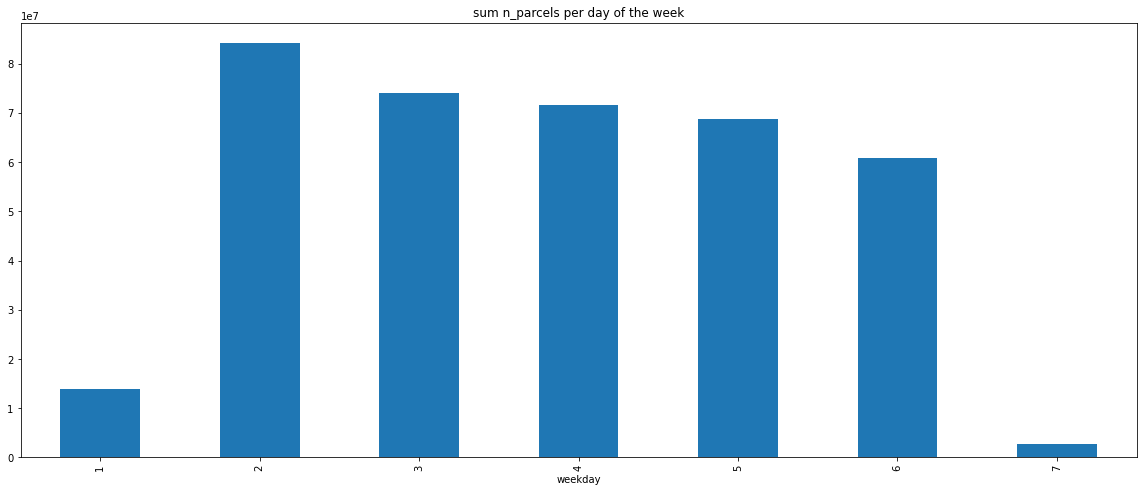

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
df_daytype_parcels_2017.groupby(['weekday'])['n_parcels'].sum().plot.bar().set(title='sum n_parcels per day of the week')

We can see that less packages are registered each weekday and that on the weekend Sundays (1) registers more than Saturdays (7), so there is a weekly seasonality.

In summary, we have the following conclusions.
* There is an annual trend.
* There is a weekly trend (important weekends with very little volume).
* There is a great instability at the end of the year due to the period that includes Black Friday and Christmas.
* There is an anomalous period such as the period corresponding to the lockdown and the summer of 2020 with a very pronounced increase in volume.

**Descomposition**

Time series have a number of characteristics:
* Trends: long-term increase or decrease.
* Cycles: rises and falls without a fixed period.
* Seasonality: deterministic pattern of fixed and known duration of a season.
* Volatility: noise due to unpredictable factors not assignable to the above characteristics.

So, let's decompose our time series to keep going on knowing it (the library statsmodels can help us do it).

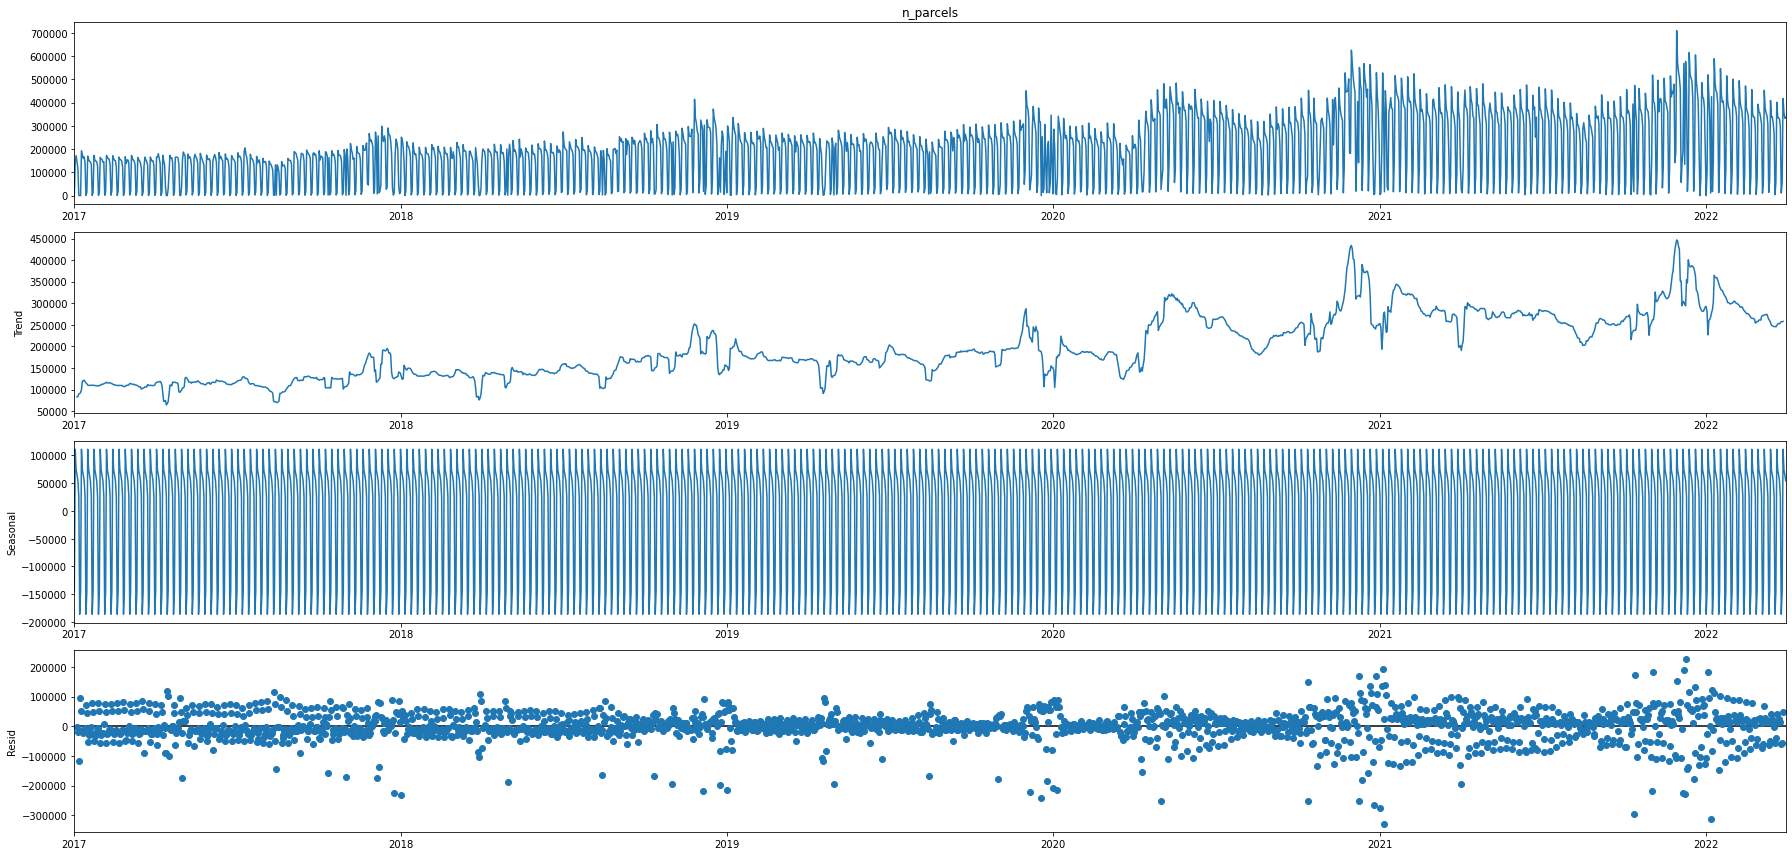

In [22]:
# descompose time series
res = sm.tsa.seasonal_decompose(df_daytype_parcels_2017['n_parcels'], model='add')

fig = res.plot()
fig.set_size_inches((25, 12))

fig.tight_layout()
plt.show()

We can see how the weekly seasonality is detected. However, the trend, despite being upward, is somewhat strange, so that the residuals have periods of high values.

This can be explained by the fact that this type of decomposition only works with one seasonality, so that the annual one is not taken into account. In addition, high residual values are observed at the end of the year due to Black Friday and Christmas and, on the other hand, on holidays, all already identified in the calendar variables generated previously.

**Test ADF**

The ADF test (Augmented Dickey Fuller test) is a unit root test for stationarity, i.e. to study the stability of the series over time (mean, variance and covariance constant over time). If the series were not stationary, it would be very difficult to model it using simple models (for example, ARIMA) and some transformation of the data (e.g., a logarithm) could be sought to make it stationary.

Let's go check if our data is stationary or not using adfuller.

To do this, at first we implement a function that performs this test using the statsmodels module, obtaining that the series is stationary, so it is stable over time and it is not necessary to perform any transformation looking for its stability.

In [23]:
# test adf function
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for ", title)

In [24]:
test_adf(df_daytype_parcels_2017['n_parcels'], "n_parcels")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary n_parcels


This test check our data is stationary, so our time series is stable.

**ACF and PACF**

In time series, autocorrelation is a statistical term that describes the presence or absence of correlation in the data. That is, it refers to when the values of a variable over time are not independent and earlier observations influence later ones.

On the one hand, the ACF function measures the correlation between two variables separated by k periods, while the PACF function measures the correlation between two variables separated by k periods without considering the dependence created by the intermediate data between them.

As usual, statsmodels is our friend in this type of task.

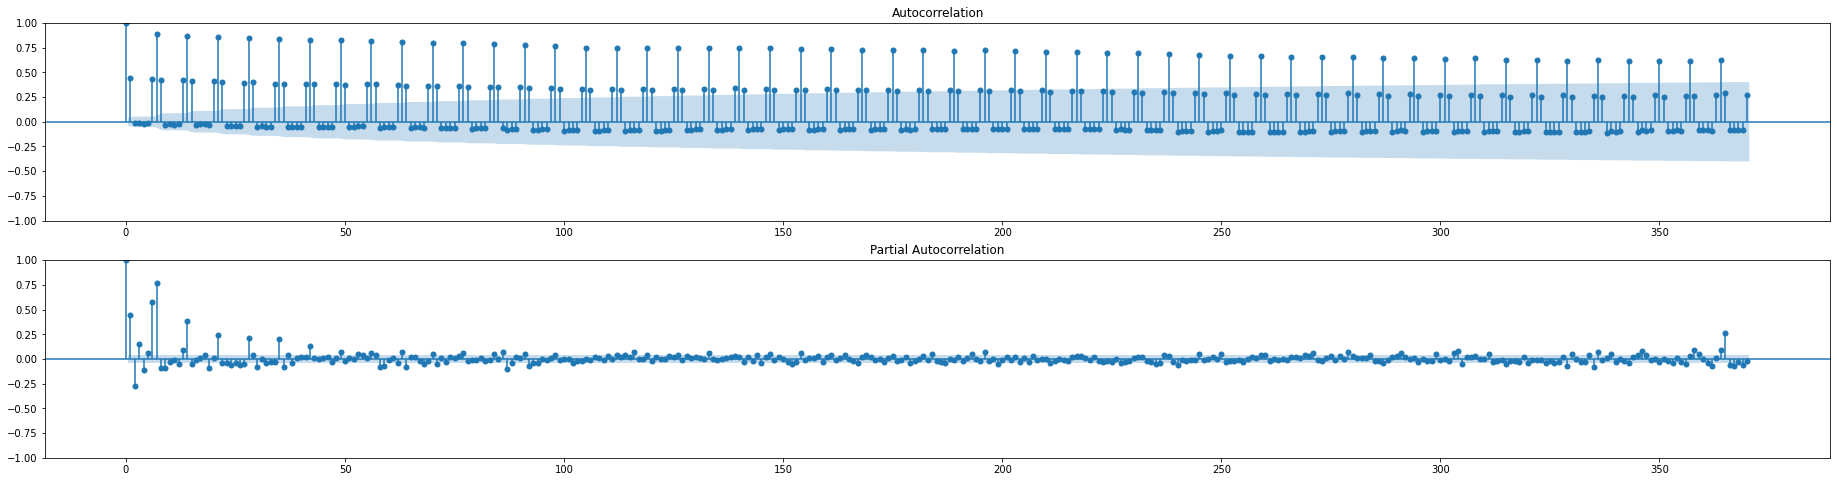

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(32, 8))
# ACF
plot_acf(df_daytype_parcels_2017['n_parcels'], lags=370, ax=ax[0])
# PACF
plot_pacf(df_daytype_parcels_2017['n_parcels'], lags=370, ax=ax[1])
plt.show()

The ACF graph shows the importance of lags 1, 6, 7 and so on as the history progresses.

In the PACF, again, the importance of the lags of the previous days in the period of one week is observed and the lag365, i.e., one year ago (365 days) is also noteworthy.

Then, lags 1, 2, 3, 4, 6, 7, 14, 21, 28 and 365 are added to the dataframe with the historical data of the number of packets recorded daily and with the calendar variables.



Let's create our final dataset with the lags and calendar data (as we are going to include lag 365, we take the data from 2016).

In [26]:
df_daytype_parcels_lags_2016 = df_daytype_parcels_2010[(df_daytype_parcels.index>='2016-01-02')&(df_daytype_parcels.index<'2023-01-01')]

# add lags to dataset
for d in [1, 2, 3, 4, 6, 7, 14, 21, 28, 365]:
  df_daytype_parcels_lags_2016[f"gap-{d}"] = df_daytype_parcels_lags_2016["n_parcels"].shift(d)

df_daytype_parcels_lags_2016 = df_daytype_parcels_lags_2016.dropna()

df_daytype_parcels_lags_2016.head()

,n_parcels,weekday,monthday,month,year,date_c,yearday,fest,eve,postFest,...,gap-1,gap-2,gap-3,gap-4,gap-6,gap-7,gap-14,gap-21,gap-28,gap-365
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,92.0,1,1,1,2017,2017-01-01,1,False,True,False,...,903.0,141984.0,155798.0,156875.0,42071.0,6.0,29760.0,27698.0,31996.0,6464.0
2017-01-02,145745.0,2,2,1,2017,2017-01-02,2,True,False,False,...,92.0,903.0,141984.0,155798.0,180965.0,42071.0,218805.0,194117.0,185622.0,26144.0
2017-01-03,172005.0,3,3,1,2017,2017-01-03,3,False,False,True,...,145745.0,92.0,903.0,141984.0,156875.0,180965.0,188453.0,177606.0,4065.0,113361.0
2017-01-04,146216.0,4,4,1,2017,2017-01-04,4,False,False,False,...,172005.0,145745.0,92.0,903.0,155798.0,156875.0,181162.0,174722.0,190351.0,89541.0
2017-01-05,117517.0,5,5,1,2017,2017-01-05,5,False,True,False,...,146216.0,172005.0,145745.0,92.0,141984.0,155798.0,172260.0,167108.0,5493.0,561.0


Finally, we have as a result the dataframe with all the days between the first and the last one, the number of packets of each day and some columns with calendar data and the important lags.

Let's save this dataframe again.

In [27]:
# save data
df_daytype_parcels_lags_2016.to_csv("../files/data/daytypelags2017_parcels.csv", header=True)


So, the next step is to implement the models to predict the next day's recorded parcels.